In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("AirPassengers.csv")

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

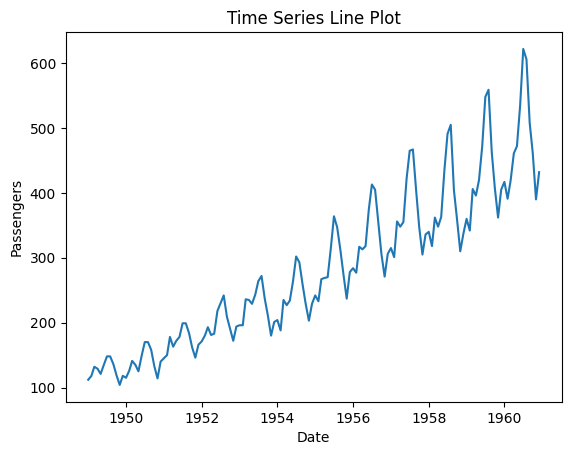

In [10]:
plt.figure()
plt.plot(df['Date'], df['Passengers'])
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.title("Time Series Line Plot")
plt.show()


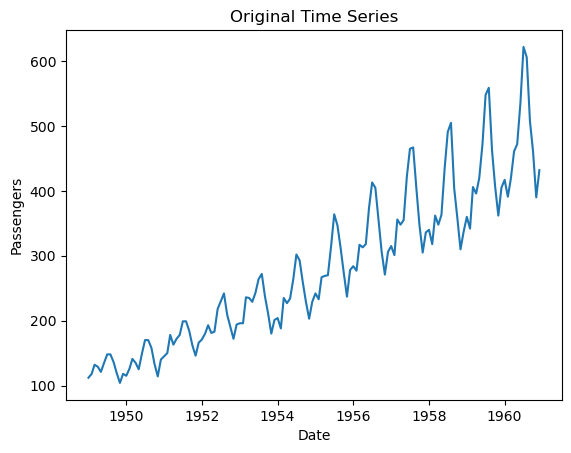

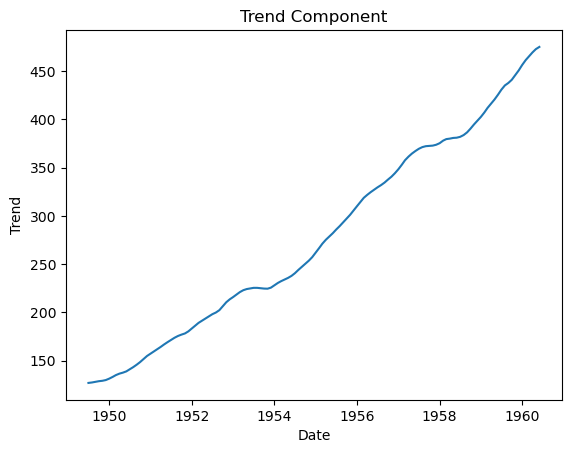

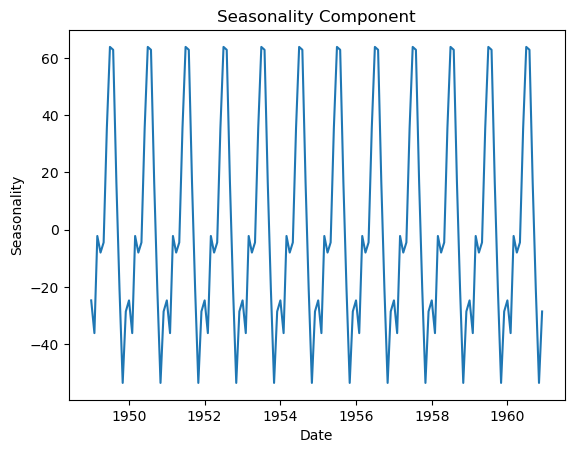

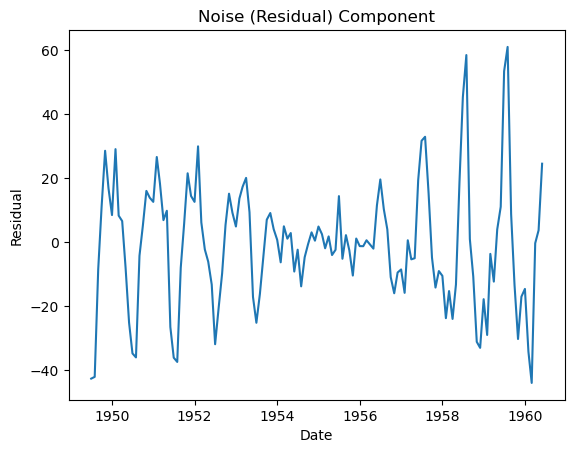

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv('AirPassengers.csv')

# Rename columns
df.columns = ['Date', 'Passengers']

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 1. Original Time Series
plt.figure()
plt.plot(df['Passengers'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# 2. Seasonal Decomposition
decomposition = seasonal_decompose(df['Passengers'], model='additive')

# Trend
plt.figure()
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()

# Seasonality
plt.figure()
plt.plot(decomposition.seasonal)
plt.title('Seasonality Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.show()

# Noise (Residual)
plt.figure()
plt.plot(decomposition.resid)
plt.title('Noise (Residual) Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
print(df.columns.tolist())

['Date', 'Passengers']


In [5]:
df.columns = df.columns.str.strip()

In [7]:
df = pd.read_csv("AirPassengers.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.head())

            Passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


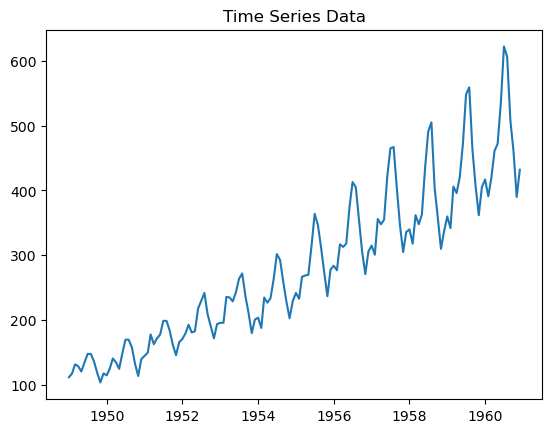

In [8]:
plt.plot(df)
plt.title("Time Series Data")
plt.show()

In [10]:
df.index.freq = 'MS'

In [11]:
df = df.asfreq('MS')

NameError: name 'df' is not defined

In [12]:
model = ARIMA(df['Passengers'], order=(1,1,1))
model_fit = model.fit()

In [13]:
forecast = model_fit.forecast(steps=12)
print(forecast)

1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64


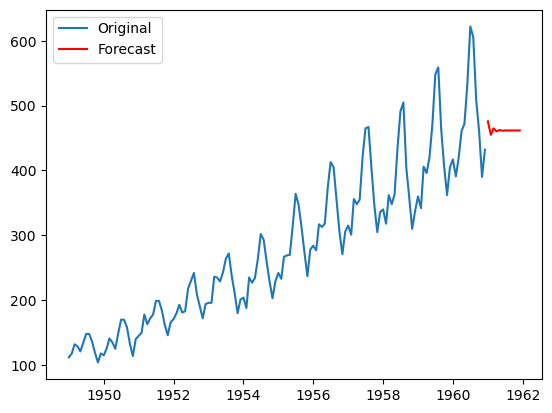

In [14]:
plt.plot(df, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [9]:
from prophet import Prophet

In [13]:
prophet_df = df.reset_index()
prophet_df.columns = ['ds', 'y']

In [14]:
model = Prophet()
model.fit(prophet_df)

12:17:22 - cmdstanpy - INFO - Chain [1] start processing
12:17:22 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods=12,freq= 'ME')

In [17]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,575.744662,546.002691,602.975804
152,1961-08-31,529.327406,499.412773,557.240716
153,1961-09-30,492.512127,462.026628,521.507458
154,1961-10-31,462.466933,433.640060,491.612950
155,1961-11-30,492.123220,464.514973,520.810822


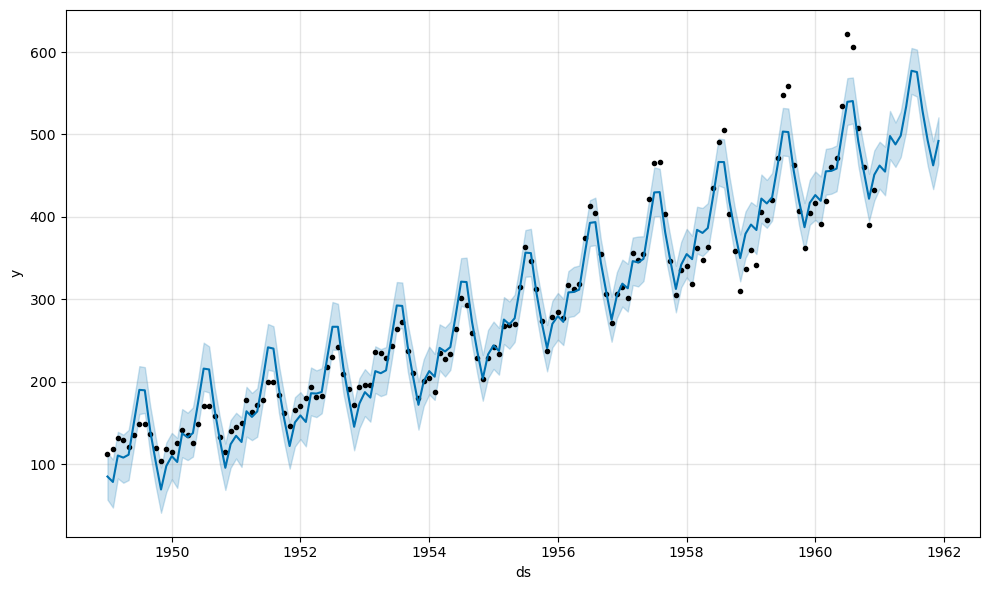

In [18]:
model.plot(forecast)
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [20]:
train = df[:-12]
test = df[-12:]

In [25]:
if 'ds' in df.columns:
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace=True)

df = df.asfreq('MS')

In [27]:
predictions = model_fit.forecast(steps=12)

In [28]:
mae = mean_absolute_error(test['Passengers'], predictions)
rmse = np.sqrt(mean_squared_error(test['Passengers'], predictions))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 66.24167467071877
RMSE: 91.22883941723174


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual = test['Passengers'].values
predicted = forecast['yhat'][-12:].values

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 41.91097517441795
RMSE: 47.472186634259394


In [30]:
import matplotlib.pyplot as plt

In [31]:
# test -> actual values
# predictions -> forecasted values

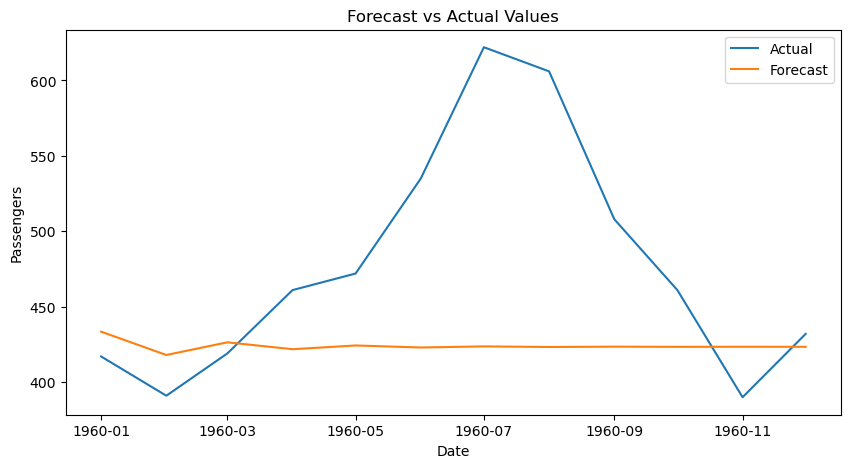

In [32]:
plt.figure(figsize=(10,5))

plt.plot(test.index, test['Passengers'], label='Actual')
plt.plot(test.index, predictions, label='Forecast')

plt.title("Forecast vs Actual Values")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

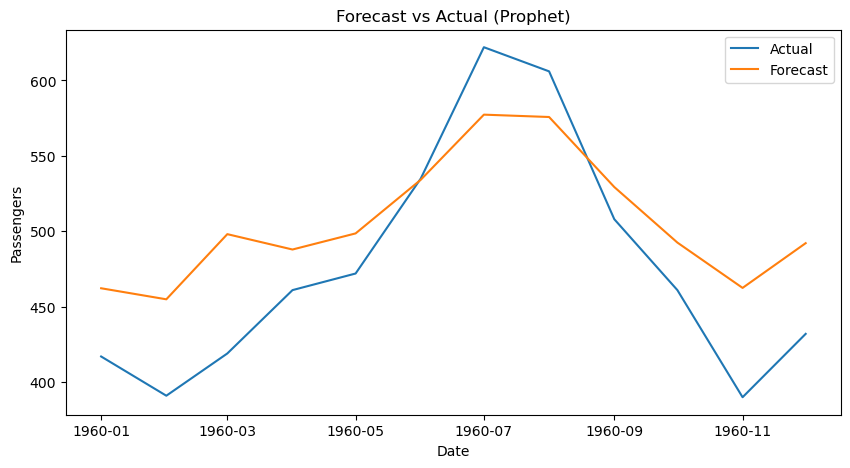

In [33]:
plt.figure(figsize=(10,5))

plt.plot(test.index, test['Passengers'], label='Actual')
plt.plot(test.index, forecast['yhat'][-12:].values, label='Forecast')

plt.title("Forecast vs Actual (Prophet)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()